In [1]:
# !pip install nltk
# !pip install wordcloud

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from os import path
import time
import calendar
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.tokenize import sent_tokenize, word_tokenize
import csv,warnings
  
warnings.filterwarnings(action = 'ignore')
  
import gensim
from gensim.models import Word2Vec


#from wordcloud import WordCloud, STOPWORDS

#NLTK
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

#Model Training
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score


# Importing CSV files

In [3]:
train_df=pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_training_data_with_class_labels.csv" , error_bad_lines=False) 

C:\Users\VATSALA NEMA\AppData\Local\Temp\ipykernel_9924\2517431560.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  train_df=pd.read_csv("C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_training_data_with_class_labels.csv" , error_bad_lines=False)


In [4]:
train_df 

,ID,Comments,Parent Comments,Class Labels,Unnamed: 4
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic,NaN
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic,NaN
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic,NaN
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic,NaN
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic,NaN
...,...,...,...,...,...
808098,Arectarius,50% hp/def elgif; impiety orb; bourn jewel che...,Hate to break it to you; but Gloomy can't do a...,sarcastic,NaN
808099,dale1v,Rubicon Mango.,Hey Reddit; if you could only drink one flavor...,non-sarcastic,NaN
808100,Semyonov,Essentially GAP insurance right?,I'm sure you can pay for it. Most insurance pl...,non-sarcastic,NaN
808101,futalover99,Yeah; but sometimes that weird kid keeps tryin...,Ive been subscribed to that for a while; and a...,non-sarcastic,NaN


# Cleaning the dataset

In [5]:
df1 = train_df[train_df.isna().any(axis=1)]

In [6]:
df1

,ID,Comments,Parent Comments,Class Labels,Unnamed: 4
0,ocxtitan,Central Illinois,Jesus; where do you live?,non-sarcastic,NaN
1,LeChuckly,To think - CNN used to be the acronym synonymo...,Even The CNN Staff Is Sick Of The Wall-To-Wall...,non-sarcastic,NaN
2,throwitskrub8,But then again; you have to consider that all ...,agree to that part.It can also mean that gujra...,non-sarcastic,NaN
3,fresherthanyouuu,ughhhhh,If a guy told you he doesn't use social media ...,non-sarcastic,NaN
4,_kushagra,I should've put the,No; it's just a programming bug. After all; th...,sarcastic,NaN
...,...,...,...,...,...
808098,Arectarius,50% hp/def elgif; impiety orb; bourn jewel che...,Hate to break it to you; but Gloomy can't do a...,sarcastic,NaN
808099,dale1v,Rubicon Mango.,Hey Reddit; if you could only drink one flavor...,non-sarcastic,NaN
808100,Semyonov,Essentially GAP insurance right?,I'm sure you can pay for it. Most insurance pl...,non-sarcastic,NaN
808101,futalover99,Yeah; but sometimes that weird kid keeps tryin...,Ive been subscribed to that for a while; and a...,non-sarcastic,NaN


In [7]:
df2= train_df.dropna()

In [8]:
df2.rename(columns = {' Class Labels ':'label'}, inplace = True)

C:\Users\VATSALA NEMA\AppData\Local\Temp\ipykernel_9924\3756746671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns = {' Class Labels ':'label'}, inplace = True)


In [9]:
df2['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)

C:\Users\VATSALA NEMA\AppData\Local\Temp\ipykernel_9924\1160797125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['label'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)


# Explorartory Data Analysis

In [10]:
df2.head()

,ID,Comments,Parent Comments,label,Unnamed: 4
72350,CatLions,heres some MATH for you fat + person = gross,"Twice the size of everyone else = 3(2),non-sar...",Chaining help So i was dexnav chaining for a r...,non-sarcastic
104350,Nextasy,Ah yes; I remember grade seven.,"Penis'',non-sarcastic\nDemon9ne,Yeah; I rememb...",And I assume that's a big f you to all us peop...,sarcastic
202371,CTeam19,What is the funniest thing Coach Leech has don...,Guns Up Reddit !! I'm Coach Kliff Kingsbury AM...,When a young moderately attractive gentleman a...,non-sarcastic
207921,DanBRZ,Future Pro Bowl LB Ramon Humber now.,Patriots have reached a 1-year contract agreem...,Why is this so funny?,non-sarcastic
309630,Eternally65,We surrender!,What a lot of scoundrels! That's it!! If they ...,What about some of the other races of the cove...,non-sarcastic


In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 72350 to 790508
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               10 non-null     object
 1   Comments         10 non-null     object
 2   Parent Comments  10 non-null     object
 3   label            10 non-null     object
 4   Unnamed: 4       10 non-null     object
dtypes: object(5)
memory usage: 480.0+ bytes


**Exploratory Data Analysis**

In [12]:
# to check number of sarcastic and non-sarcastic comments
df2['label'].value_counts()

Chaining help So i was dexnav chaining for a ralts on r102 and then i got the thing "cannot be found in the area or whatever" so then i start walking around to reset it and thrn a wild lillipup shows up so i sneak up to it assuming that if i dont battle it it will brwka my chain. Now im in battle with it right now but its level 17 (it was my 20th chain) does incountering a different wild pokemon reset my chain? thanks.    1
And I assume that's a big f you to all us people of color; gays; and women who voted for her instead of Bernie because we don't believe in his phoney promises; he has no history with us; and just joined the Democratic Party to us it to run; trash it and its leader; and leave again.                                                                                                                                                1
When a young moderately attractive gentleman appears and says with a quivering voice "Hey how are you? :}" (x-post from r/justneckbeardthings)  

Almost equal number of sarcastic and non-sarcastic comments.

In [13]:
#Checking percentage of sarcastic and non-sarcastic comments
print(df2['label'].value_counts()/len(df2))

Chaining help So i was dexnav chaining for a ralts on r102 and then i got the thing "cannot be found in the area or whatever" so then i start walking around to reset it and thrn a wild lillipup shows up so i sneak up to it assuming that if i dont battle it it will brwka my chain. Now im in battle with it right now but its level 17 (it was my 20th chain) does incountering a different wild pokemon reset my chain? thanks.    0.1
And I assume that's a big f you to all us people of color; gays; and women who voted for her instead of Bernie because we don't believe in his phoney promises; he has no history with us; and just joined the Democratic Party to us it to run; trash it and its leader; and leave again.                                                                                                                                                0.1
When a young moderately attractive gentleman appears and says with a quivering voice "Hey how are you? :}" (x-post from r/justneckbeardthing

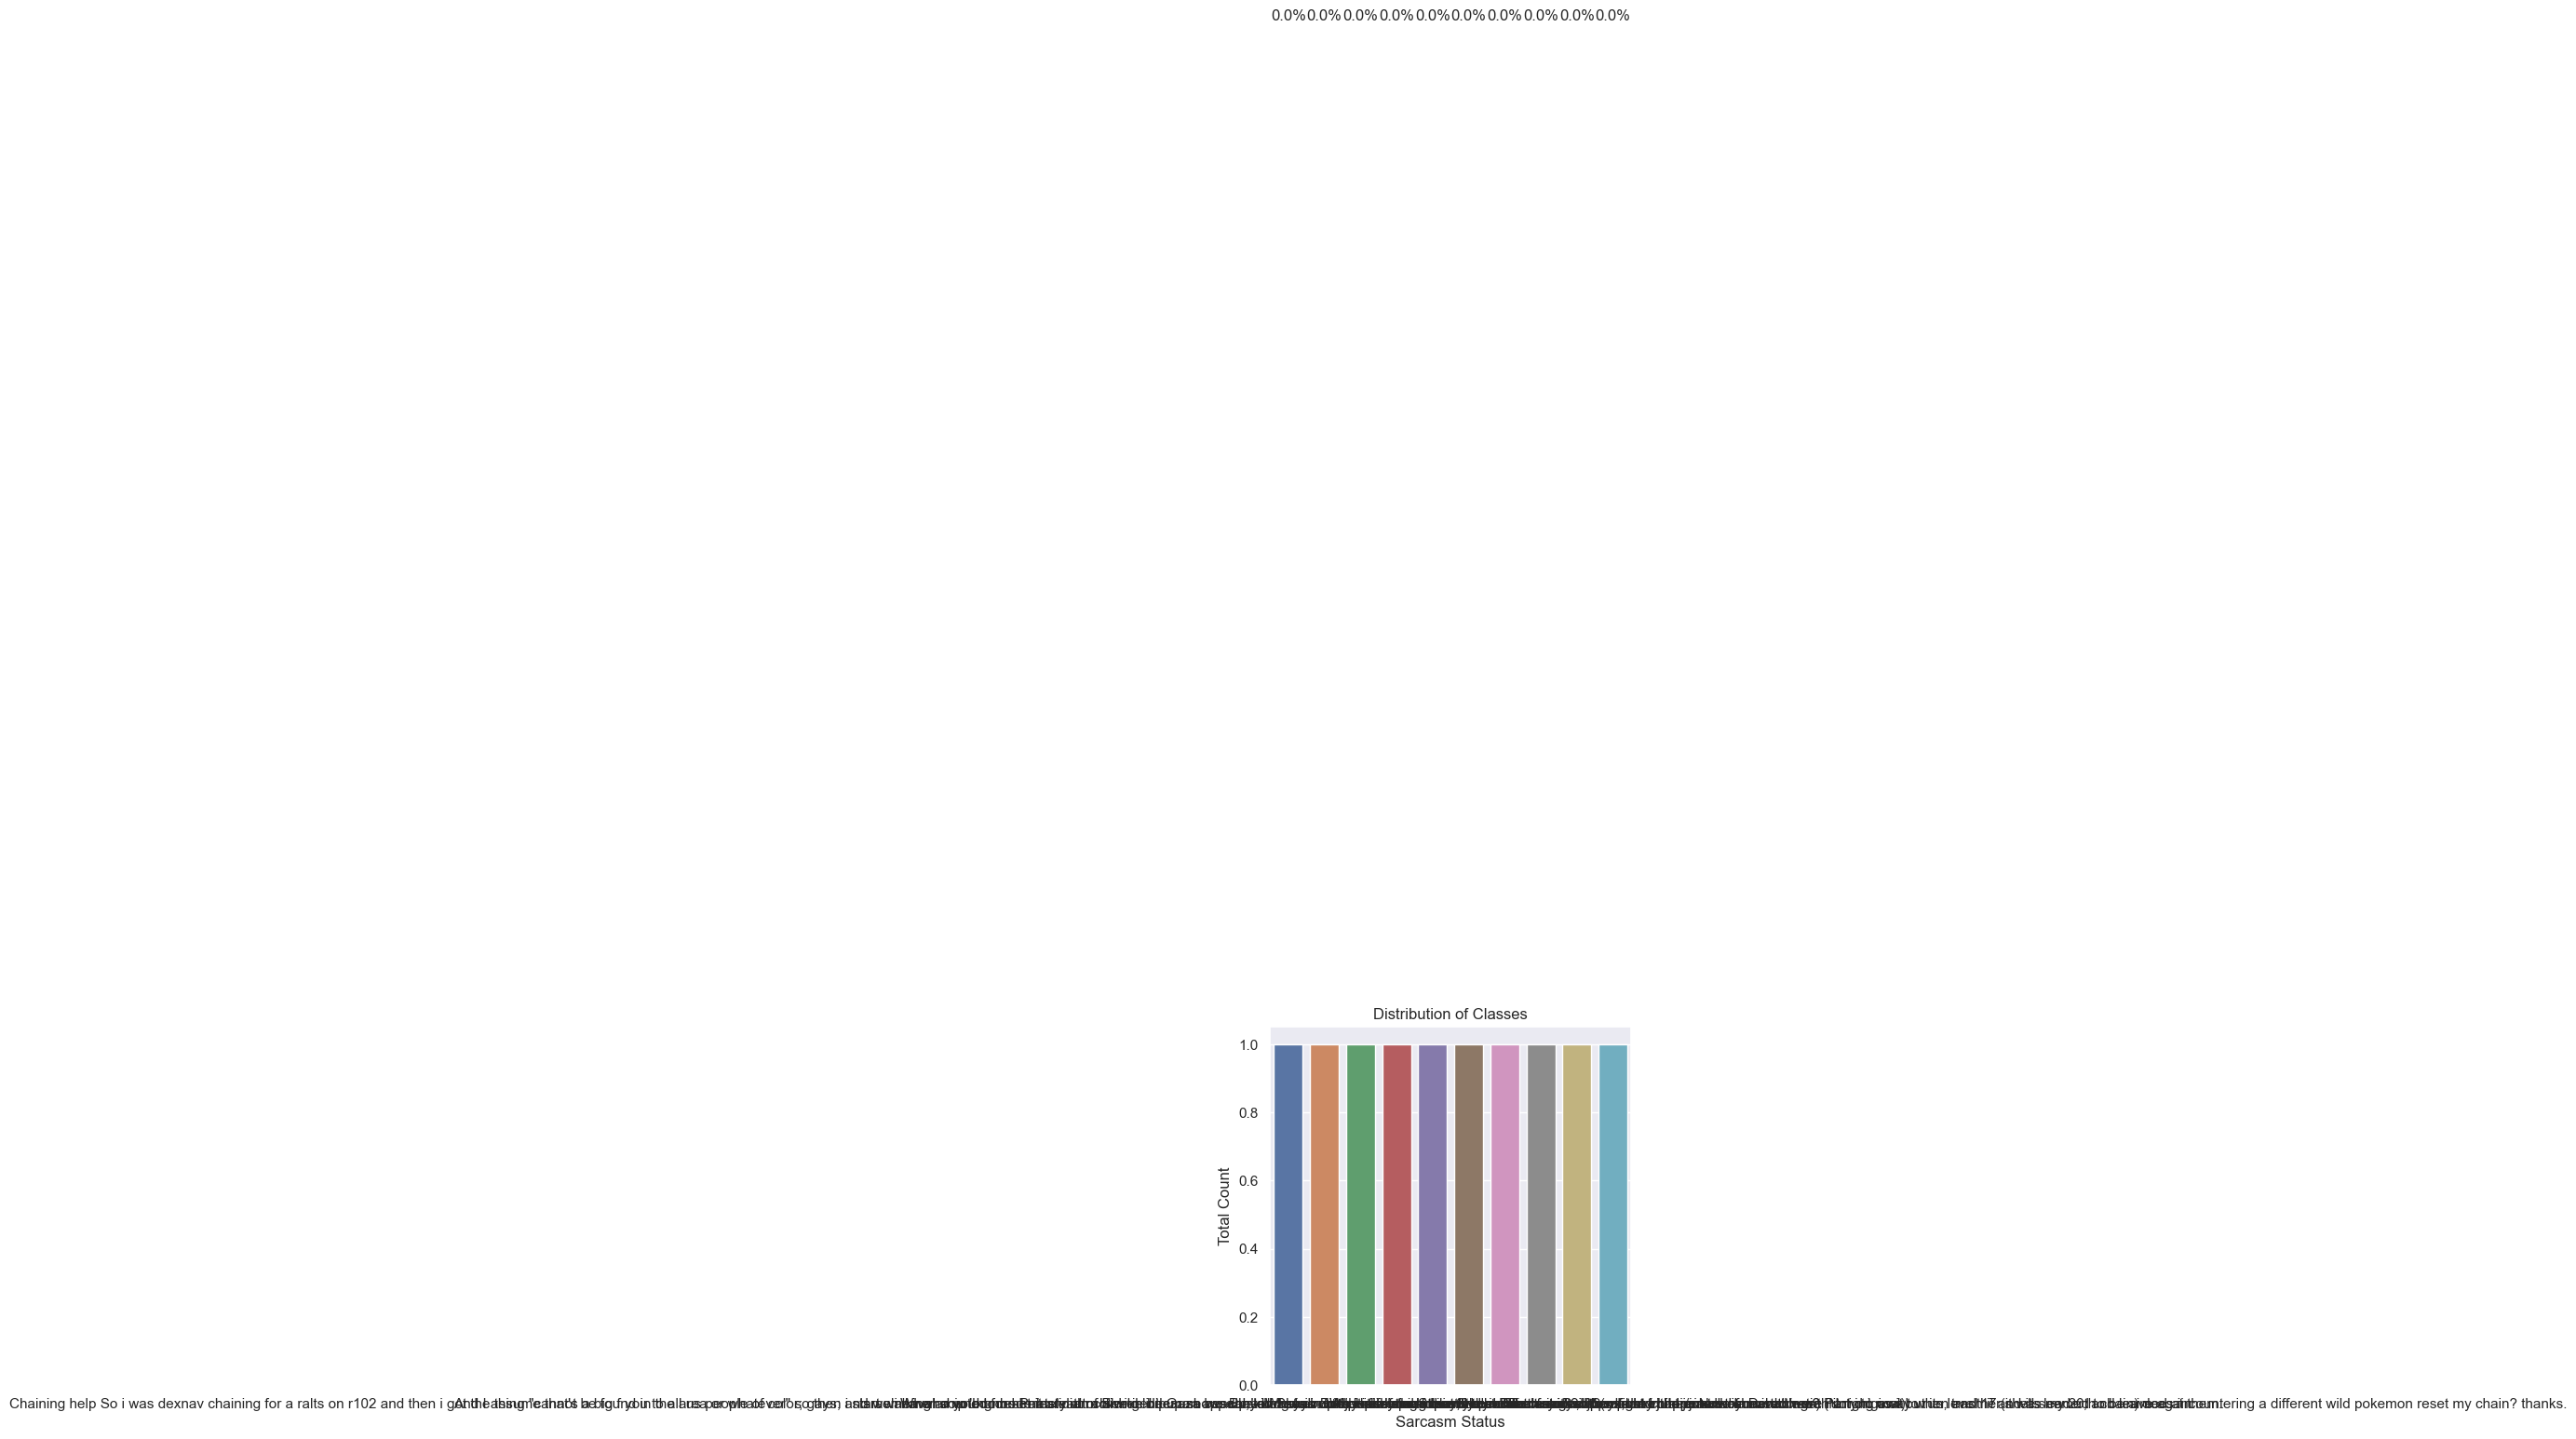

In [17]:
#Plotting percentage of sarcastic and non-sarcastic comments
plt.figure(figsize=(5,5))
ax = sns.countplot(x='label',  data= df2)
ax.set(title = "Distribution of Classes", xlabel="Sarcasm Status", ylabel = "Total Count")
total = float(len(train_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format((height/total)*100),
            ha="center") 
plt.show()

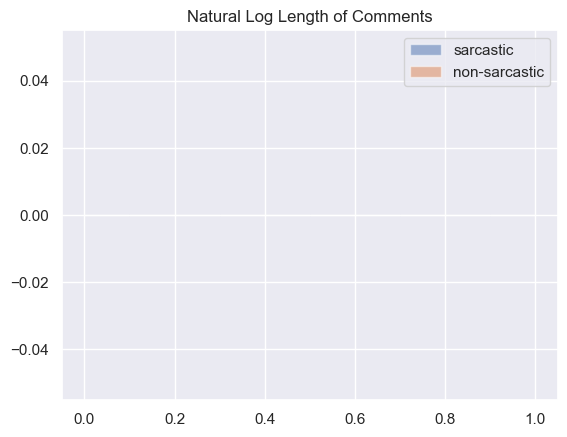

In [18]:
# To check if there is any relation between the length of the comment and its label
df2.loc[df2['label']==1,'Comments'].str.len().apply(np.log1p).hist(label='sarcastic', alpha=.5)
df2.loc[df2['label']==0,'Comments'].str.len().apply(np.log1p).hist(label='non-sarcastic', alpha=.5)
plt.legend()
plt.title('Natural Log Length of Comments')
plt.show()

Sarcastic comments are normally distributed in length. Non-sarcastic comments has a right-skew.

Finding the most common words in the sarcastic comments using wordclous
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,
                max_words = 200, max_font_size = 100, 
                random_state = 17, width=800, height=400)

plt.figure(figsize=(12, 12))
wordcloud.generate(str(df2.loc[df2['label'] == 1, 'Parent Comments']))
plt.grid(b= False)
plt.imshow(wordcloud);

In [ ]:
# Comparing sarcastic comments with Parent comments
sarcasm_comm_len = np.array(df2.loc[df2['label'] == 1]['Comments'].str.len())
parent_comm_len = np.array(df2.loc[df2['label'] == 1]['Parent Comments'].str.len())
ratio_len = np.array((df2.loc[df2['label'] == 1]['Comments'].str.len())/(df2.loc[df2['label'] == 1]['Parent Comments'].str.len()))

In [ ]:
d = pd.DataFrame({'Comment Length': sarcasm_comm_len, 'Parent Comment Length': parent_comm_len, 'Ratio Length': ratio_len}, columns=['Comment Length', 'Parent Comment Length', 'Ratio Length'])

In [ ]:
ax = plt.axes()
sns.scatterplot(data=d, x="Comment Length", y="Parent Comment Length",  size=ratio_len)
ax.set_title("Comparing Sarcastic Comment Length with Parent Comment")
# control x and y limits
plt.ylim(0, 12000)
plt.xlim(0, 800)
plt.show()

We find that parent comment length and comment length of sarcastic comments is almost same and there is no new information revealed with parent comments. So, we will use 'Comments' in further analysis.

# Feature Extraction

***Bag of Words Model***

To look at the most frequent words in the Comments using bag of words model

In [ ]:
vectorizer_1 = CountVectorizer(stop_words='english', ngram_range=(1, 1)) #unigram
vectorizer_2 = CountVectorizer(stop_words='english', ngram_range=(2, 2)) #bigram

In [ ]:
#vectorizer_1 = CountVectorizer(ngram_range=(1, 1)) #unigram
#vectorizer_2 = CountVectorizer (ngram_range=(2, 2)) #bigram

In [ ]:
# Function to calculate frequency of words in comments
def freq_words(vectorizer, data):
    X = vectorizer.fit_transform(data)
    freqs = zip(vectorizer.get_feature_names(), np.asarray(X.sum(axis=0)).ravel())
    return sorted(freqs, key = lambda x: x[1], reverse=True)[:10]

In [ ]:
# For unigrams from comments
l = [freq_words(vectorizer_1, df2[df2['label']==1]['Comments']),
     freq_words(vectorizer_1, df2[df2['label']==0]['Comments'])]
list(map(list, zip(*l)))

Here, the first column shows sarcastic comments and second column shows non-sarcastic comments. Since we have not removed stopwords, we are geeting a lot of stopwords as unigrams here. Also, Unigramms from the sarcastic comments are mostly same as from the non-sarcastic comments, hence these unigramms do not help in seprating sarcastic comments from non-sarcastic comments.   

In [ ]:
#bigrams
l = [freq_words(vectorizer_2, df2[df2['label']==1]['Comments']),
     freq_words(vectorizer_2, df2[df2['label']==0]['Comments'])]
list(map(list, zip(*l)))

As we can see that the  bigramms vectorizer shows us better (more specific) results as compared to unigrams.

In [ ]:
df2 = df2[:5000] #RAM crashes if we take more dataset

In [ ]:
corpus = df2['Comments'].values.astype('U') # converting to unicode because system unable to identify special characters.

In [ ]:
corpus

In [ ]:
labels = df2['label'].to_list()

***Tf-idf Vectorizer***

In [ ]:
#vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))
vectorizer = TfidfVectorizer(ngram_range=(1,1))

tfidf = vectorizer.fit_transform(corpus)

In [ ]:
tfidf = tfidf.toarray()

In [ ]:
# cv_dataframe=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
# #print(cv_dataframe)

**Word Embeddings**

In [4]:
f1=open('C:/Users/VATSALA NEMA/Documents/SEM 7/NLP 2022/Project- Sarcasm detection in Soc med/Dataset/project1/project_training_data_with_class_labels.csv')
#f1['Class Labels'].replace(['non-sarcastic','sarcastic'],[1,0], inplace = True)
reader = list(csv.reader(f1, delimiter='\t'))
text=''
labels=[]



In [6]:
reader[0]

['ID,Comments,Parent Comments, Class Labels ,']

In [11]:
for item in reader:
    if item[0]=='Sarcastic':
        labels.append(1)
    else:
        labels.append(0)
    text+=item[0]+'. '

for sentence in sent_tokenize(text):
    words = []    
    for word in word_tokenize(sentence):  # tokenize the sentence into words
        words.append(word.lower()) 
    data.append(words)

model = Word2Vec(words, min_count=1)

print(model)

words2=list(model.wv.vocab)
print(words2)

print(model['sentence'])

model.save('model.bin')

new_model=Word2Vec.load('model.bin')
print(new_model)



KeyboardInterrupt: 

In [ ]:
#Visualizing the word vectors
X = model[model.wv.vocab]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words2):
	plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()

In [12]:
#Since, training our own word vectors is very time consuming, we train it on Google's pre-trained word2vec model
from gensim.models import KeyedVectors
filename = 'GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(words, binary=True)



ValueError: not enough values to unpack (expected 2, got 0)

## Not removing stopwords

*Training the model*

*Logistic Regression*

In [ ]:
# parameters = {'solver': [ 'lbfgs', 'liblinear', 'saga'], 'verbose': [0, 1, 2]}

# # multinomial logistic regression a.k.a softmax classifier
# logit = LogisticRegression(random_state= 42)

# logit_classifier = GridSearchCV(logit, parameters, cv = 10, n_jobs= 4)

# # sklearn's pipeline
# tfidf_logit_pipeline = Pipeline([('vectorizer', vectorizer), 
# ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)), ('logit_classifier', logit_classifier)])

# start = time.time()
# tfidf_logit_pipeline.fit(x_train, y_train)
# end = time.time()
# print(end - start) 

# print(logit_classifier.best_params_)
# print(logit_classifier.best_score_)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier
clf_lr=LogisticRegression(class_weight='balanced') 
clf_lr_parameters = {'clf__solver':('newton-cg','lbfgs','liblinear','saga')}    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_lr),]) 


#Classificaion
parameters={**clf_lr_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)

In [ ]:
accuracy_lr1 = accuracy_score(test_y, predicted)


In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (Logistic Regression): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(test_y,predicted)


In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Support Vector Machine*

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf_svm=SVC()

clf_parameters = {'clf__kernel':('linear', 'poly'),#, 'rbf', 'sigmoid'),
                  'clf__C' : (0,1),#,3,5,10)}    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_svm),]) 
    
#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


In [ ]:
accuracy_svm1 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (SVM): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Multinomial Naive Bayes*

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf_mnb=MultinomialNB(fit_prior=True, class_prior=None)


clf_parameters = {'clf__alpha':(0,1,2),}   
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_mnb),]) 
    


#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


In [ ]:
accuracy_mnb1 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-1 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [ ]:
print ('Training Accuracies for comments without removing stop-words : ')
print ('Logistic Regression: ', accuracy_lr1)
print ('Support Vector Machine: ', accuracy_svm1)
print ('Multinomial Naive Bayes ', accuracy_mnb1)


## With stopwords

*Logistic Regression*

In [ ]:
vectorizer_1 = CountVectorizer(stop_words='english', ngram_range=(1, 1)) #unigram
vectorizer_2 = CountVectorizer(stop_words='english', ngram_range=(2, 2)) #bigram

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1))

X = vectorizer.fit_transform(corpus)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier
clf_lr=LogisticRegression(class_weight='balanced') 
clf_lr_parameters = {'clf__solver':('newton-cg','lbfgs','liblinear','saga')}    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf_lr),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams or Trigrams
}

#Classificaion
parameters={**feature_parameters,**clf_lr_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)

In [ ]:
accuracy_lr2 = accuracy_score(test_y, predicted)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*SVM*

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf=SVC()

clf_parameters = {'clf__kernel':('linear', 'poly'),#, 'rbf', 'sigmoid'),
                  'clf__C' : (0,1),#,3,5,10),
                  }    
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams or Trigrams
}

#Classificaion
parameters={**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


In [ ]:
accuracy_svm2 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-2 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Multinomial Naive Bayes*

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(corpus, labels, test_size=0.20, random_state=42,stratify=labels)
#Classifier

clf=MultinomialNB(fit_prior=True, class_prior=None)


clf_parameters = {'clf__alpha':(0,1,2),}   
        
#Feature Extraction
pipeline = Pipeline([
('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),     
('clf', clf),]) 

feature_parameters = {
"vect__stop_words": (None, 'english'),
'vect__ngram_range': ((1,1),(1, 2)),  # Unigrams, Bigrams or Trigrams
}



#Classificaion
parameters={**feature_parameters,**clf_parameters} 
grid = GridSearchCV(pipeline,parameters,scoring='f1_micro',cv=10)          
grid.fit(train_x,train_y)     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)

predicted = clf.predict(test_x)
predicted =list(predicted)


In [ ]:
accuracy_mnb2 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-2 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [ ]:
print ('Training Accuracies for comments without removing stop-words : ')
print ('Logistic Regression: ', accuracy_lr2)
print ('Support Vector Machine: ', accuracy_svm2)
print ('Multinomial Naive Bayes ', accuracy_mnb2)


When we applied stop words, number of words decreased and in most cases the meaning of the comments ight have also changed that's why the accuracy of all the 3 classifiers has decreased on removing stopwords.

## Stemming

In [ ]:
# Function for stemming words in comments
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
  return (PorterStemmer().stem(w) for w in analyzer(doc))

*Logistic Regression*

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#classifier
clf=LogisticRegression(random_state=42)  
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,1), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [ ]:
accuracy_lr3 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
#micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-3 (LR): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)


In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*SVM*

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#classifier
clf=SVC()
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,1), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [ ]:
accuracy_svm3 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-3 (SVM): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*Mutlinomial Naive Bayes*

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#classifier
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(analyzer = stemmed_words, ngram_range=(1,1), token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()

#classification
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [ ]:
accuracy_mnb3 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-3 (MNB): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [ ]:
print ('Training Accuracies for comments without removing stop-words : ')
print ('Logistic Regression: ', accuracy_lr3)
print ('Support Vector Machine: ', accuracy_svm3)
print ('Multinomial Naive Bayes ', accuracy_mnb3)


## Lemmatization

In [ ]:
analyzer = CountVectorizer().build_analyzer()
def lemmatized_words(doc):
  return (WordNetLemmatizer().lemmatize(w) for w in analyzer(doc))

In [ ]:
clf=LogisticRegression()  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [ ]:
accuracy_lr4 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-4(LR): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [ ]:
clf=SVC()  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [ ]:
accuracy_svm4 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-4 (SVM): ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

*MNB*

In [ ]:
clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
vectorizer=TfidfVectorizer(analyzer = lemmatized_words,ngram_range=(1,1),token_pattern=r'\b\w+\b')
tfidf = vectorizer.fit_transform(corpus)
tfidf = tfidf.toarray()
# Training and Test Split           
  
train_x, test_x, train_y, test_y = train_test_split(tfidf, labels, test_size=0.20, random_state=42,stratify=labels)

#Classificaion    
clf.fit(train_x,train_y)
predicted = clf.predict(test_x)
predicted =list(predicted)

In [ ]:
accuracy_mnb4 = accuracy_score(test_y, predicted)

In [ ]:
# Getting the accuracy metric
acc = accuracy_score(predicted, test_y)
pre = precision_score(predicted, test_y, average = 'micro')
rec = recall_score(predicted, test_y)
f1 = f1_score(predicted, test_y)
micro_f1 = f1_score(predicted, test_y, average = 'micro')

print ('Model Performance Statistic Suite-5: ')
print ('Accuracy: ', acc)
print ('Precision: ', pre)
print ('Recall: ',rec)
print ('F1 Score: ', f1)
print('Micro f1: ', micro_f1)

cm = confusion_matrix(predicted, test_y)

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[0,1]+cm[1,1])
print('Specificity : ', specificity)

In [ ]:
cm =  pd.DataFrame(cm, index=['Non-sarcastic','Sarcastic'],columns=['Non-sarcastic','Sarcastic'])
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='Greens',linewidths=0.5,fmt='.0f')
ax.set_title('Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('Predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [ ]:
print ('Training Accuracies for comments without removing stop-words : ')
print ('Logistic Regression: ', accuracy_lr4)
print ('Support Vector Machine: ', accuracy_svm4)
print ('Multinomial Naive Bayes ', accuracy_mnb4)


In [ ]:
# Y_pred = logit_classifier.predict(X_test)
# report = classification_report(Y_pred,Y_test, output_dict=True)
# report = pd.DataFrame(report).transpose()
# report = report.rename({"0": "Sarcastic Comments", "1": "Non Sarcastic Comments"})
# report

In [ ]:
# #pipeline parameters
# parameters = \
# [ \
#     {
#         'clf': [MultinomialNB()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__alpha': [0.001, 0.1, 1, 10, 100]
#     },

#     {
#         'clf': [SVC()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__C': [0.001, 0.1, 1, 10, 100, 10e5],
#         'clf__kernel': ['linear', 'rbf'],
#         'clf__class_weight': ['balanced'],
#         'clf__probability': [True]
#     },

#     {
#         'clf': [LogisticRegression()],
#         'tf-idf__stop_words': ['english', None],
#         'clf__criterion': ['gini','entropy'],
#         'clf__splitter': ['best','random'],
#         'clf__class_weight':['balanced', None]
#     }
# ]

# #evaluating multiple classifiers
# #based on pipeline parameters
# #-------------------------------
# result=[]

# for params in parameters:

# #classifier
#     clf = params['clf'][0]

# #getting arguments by
# #popping out classifier
#     params.pop('clf')

# #pipeline
#     steps = [('tf-idf', TfidfVectorizer()), ('clf',clf)]

# #cross validation using
# #Grid Search
#     grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=10)
#     grid.fit(corpus, labels)

# #storing result
#     result.append\
#     (
#         {
#             'grid': grid,
#             'classifier': grid.best_estimator_,
#             'best score': grid.best_score_,
#             'best params': grid.best_params_,
#             'cv': grid.cv
#         }
#     )   

# #sorting result by best score
# result = sorted(result, key=itemgetter('best score'),reverse=True)

# #saving best classifier
# grid = result[0]['grid']
# print(grid)